Alhassan, Abdulaziz and Sevtsuk, Andres, Madina Python Package: Scalable Urban Network Analysis for Modeling Pedestrian and Bicycle Trips in Cities. Available at SSRN: https://ssrn.com/abstract=4748255 or http://dx.doi.org/10.2139/ssrn.4748255

In [1]:
#import madina as md
import geopandas as gpd
import matplotlib.pyplot as plt

#nyc = md.Zonal()

In [2]:
nycmap = gpd.read_file('cut.shp')

In [9]:
nycmap

,FID_dcp_dc,cartodb_id,borough,feat_type,feat_statu,street_nm,honorarynm,old_st_nm,streetwidt,route_type,roadwaytyp,build_stat,record_st,paper_st,stair_st,cco_st,marg_wharf,edit_date,Shape_Leng,geometry
0,8578,7836,Staten Island,Mapped_St,Paper_St,Surf Avenue,None,NaN,60,Mjr_st,Surface_ST,Unimproved,NaN,Y,NaN,NaN,NaN,NaN,0.000921,"LINESTRING (-74.24120 40.49795, -74.24106 40.4..."
1,22820,22677,Staten Island,Mapped_St,Paper_St,Brighton Street,None,NaN,70,Gen_use,Surface_ST,Unimproved,NaN,Y,NaN,NaN,NaN,NaN,0.000484,"LINESTRING (-74.24135 40.49841, -74.24120 40.4..."
2,8578,7836,Staten Island,Mapped_St,Paper_St,Surf Avenue,None,NaN,60,Mjr_st,Surface_ST,Unimproved,NaN,Y,NaN,NaN,NaN,NaN,0.000913,"LINESTRING (-74.24038 40.49837, -74.23956 40.4..."
3,38150,38073,Staten Island,Mapped_St,City_St,Billop Avenue,None,NaN,70,Gen_use,Surface_ST,Improved,NaN,NaN,NaN,NaN,NaN,NaN,0.000114,"LINESTRING (-74.24448 40.49893, -74.24437 40.4..."
4,38149,38072,Staten Island,Mapped_St,City_St,Billop Avenue,None,NaN,70,Gen_use,Surface_ST,Improved,NaN,NaN,NaN,NaN,NaN,NaN,0.000900,"LINESTRING (-74.24437 40.49895, -74.24349 40.4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88744,18485,18282,Bronx,Mapped_St,City_St,West 261 Street,None,NaN,60,Gen_use,Surface_ST,Part_improved,NaN,NaN,NaN,NaN,NaN,NaN,0.001292,"LINESTRING (-73.91061 40.91285, -73.91057 40.9..."
88745,21374,21205,Bronx,Mapped_St,City_St,West 261 Street,None,NaN,60,Gen_use,Surface_ST,Part_improved,NaN,NaN,NaN,NaN,NaN,NaN,0.000116,"LINESTRING (-73.91069 40.91293, -73.91066 40.9..."
88746,30517,30392,Bronx,Mapped_St,City_St,Riverdale Avenue,None,NaN,100,Mjr_st,Surface_ST,Improved,NaN,NaN,NaN,NaN,NaN,NaN,0.000649,"LINESTRING (-73.90258 40.91250, -73.90246 40.9..."
88747,18485,18282,Bronx,Mapped_St,City_St,West 261 Street,None,NaN,60,Gen_use,Surface_ST,Part_improved,NaN,NaN,NaN,NaN,NaN,NaN,0.000724,"LINESTRING (-73.91057 40.91363, -73.91071 40.9..."


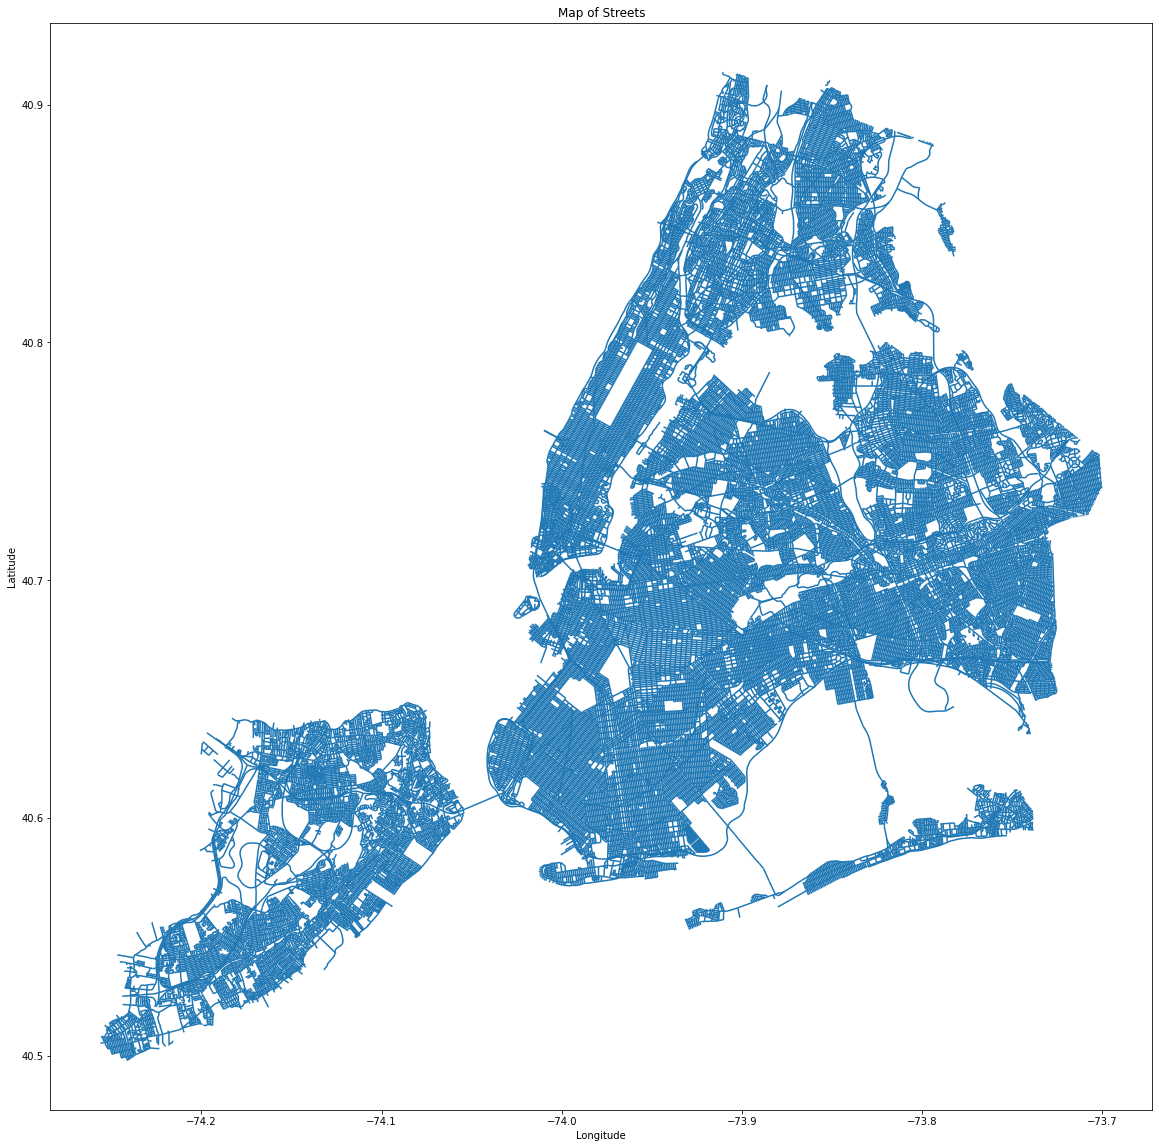

In [24]:
fig, ax = plt.subplots(figsize=(20, 20))  # Adjust the size as needed
nycmap.plot(ax=ax)

# Optional: Customize the plot
ax.set_title('Map of Streets')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

In [5]:
import pandas as pd

import itertools
from scipy.spatial import cKDTree
from shapely.geometry import Point, LineString
from operator import itemgetter

In [6]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt



In [7]:
ox.config(use_cache=True, log_console=True)

# Fetch the street network for New York City
G = ox.graph_from_place('New York City, New York, USA', network_type='drive')


<ipython-input-7-8c838bf39454>:1: FutureWarning: The `utils.config` function is deprecated and will be removed in the v2.0.0 release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  ox.config(use_cache=True, log_console=True)


In [8]:
crash_data = pd.read_csv('Motor_Crashes_20240427.csv')
crash_data.dropna(subset=['LATITUDE', 'LONGITUDE'], inplace=True)
gdf_crashes = gpd.GeoDataFrame(crash_data, geometry=gpd.points_from_xy(crash_data['LONGITUDE'], crash_data['LATITUDE']), crs='EPSG:4326')
gdf_crashes = gdf_crashes.to_crs(ox.settings.default_crs) 

edges = ox.graph_to_gdfs(G, nodes=False, edges=True)
edges_sindex = edges.sindex


<ipython-input-8-9cfbb66095fe>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  crash_data = pd.read_csv('Motor_Crashes_20240427.csv')


In [10]:
gdf_crashes

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,geometry
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN,POINT (-73.86650 40.66720)
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN,POINT (-73.91727 40.68330)
6,12/14/2021,17:05,NaN,NaN,40.709183,-73.956825,"(40.709183, -73.956825)",BROOKLYN QUEENS EXPRESSWAY,NaN,NaN,...,NaN,NaN,NaN,4486555,Sedan,Tractor Truck Diesel,NaN,NaN,NaN,POINT (-73.95682 40.70918)
7,12/14/2021,8:17,BRONX,10475.0,40.868160,-73.831480,"(40.86816, -73.83148)",NaN,NaN,344 BAYCHESTER AVENUE,...,NaN,NaN,NaN,4486660,Sedan,Sedan,NaN,NaN,NaN,POINT (-73.83148 40.86816)
8,12/14/2021,21:10,BROOKLYN,11207.0,40.671720,-73.897100,"(40.67172, -73.8971)",NaN,NaN,2047 PITKIN AVENUE,...,NaN,NaN,NaN,4487074,Sedan,NaN,NaN,NaN,NaN,POINT (-73.89710 40.67172)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2083222,04/23/2024,19:32,QUEENS,11101.0,40.744560,-73.930760,"(40.74456, -73.93076)",34 STREET,QUEENS BOULEVARD,NaN,...,NaN,NaN,NaN,4719738,Station Wagon/Sport Utility Vehicle,E-Bike,NaN,NaN,NaN,POINT (-73.93076 40.74456)
2083223,04/20/2024,3:48,STATEN ISLAND,10312.0,40.546530,-74.180435,"(40.54653, -74.180435)",ARDEN AVENUE,DRUMGOOLE ROAD EAST,NaN,...,NaN,NaN,NaN,4719810,Station Wagon/Sport Utility Vehicle,Convertible,NaN,NaN,NaN,POINT (-74.18044 40.54653)
2083224,04/20/2024,22:54,MANHATTAN,10031.0,40.820095,-73.955086,"(40.820095, -73.955086)",BROADWAY,WEST 135 STREET,NaN,...,NaN,NaN,NaN,4719839,Moped,Motorcycle,NaN,NaN,NaN,POINT (-73.95509 40.82010)
2083225,04/23/2024,7:33,QUEENS,11693.0,40.587740,-73.809875,"(40.58774, -73.809875)",ROCKAWAY BEACH BOULEVARD,BEACH 84 STREET,NaN,...,NaN,NaN,NaN,4719674,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,POINT (-73.80988 40.58774)


In [12]:
import numpy as np



In [14]:
def ckdnearest(gpd1, gpd2, gpd2_cols=['street_nm']):
    # Extract coordinates from LineStrings in gpd2 and create a flat list of coordinates and their original index
    B = [np.array(geom.coords) for geom in gpd2.geometry.to_list()]
    B_ix = tuple(itertools.chain.from_iterable(
        [itertools.repeat(i, x) for i, x in enumerate(list(map(len, B)))]))
    B = np.concatenate(B)

    ckd_tree = cKDTree(B)

    # query
    A = np.vstack(gpd1.geometry.apply(lambda geom: np.array(geom.coords[0])))
    dist, idx = ckd_tree.query(A, k=1)
    idx = itemgetter(*idx)(B_ix) if len(gpd1) > 1 else itemgetter(idx)(B_ix)  # handle single point case

    gpd_result = pd.concat(
        [gpd1.reset_index(drop=True), 
         gpd2.loc[idx, gpd2_cols].reset_index(drop=True), 
         pd.Series(dist, name='dist')], axis=1)
    return gpd_result


result = ckdnearest(gdf_crashes, nycmap)
print(result)

         CRASH DATE CRASH TIME        BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
0        09/11/2021       9:35       BROOKLYN  11208.0  40.667202 -73.866500   
1        12/14/2021       8:13       BROOKLYN  11233.0  40.683304 -73.917274   
2        12/14/2021      17:05            NaN      NaN  40.709183 -73.956825   
3        12/14/2021       8:17          BRONX  10475.0  40.868160 -73.831480   
4        12/14/2021      21:10       BROOKLYN  11207.0  40.671720 -73.897100   
...             ...        ...            ...      ...        ...        ...   
1849068  04/23/2024      19:32         QUEENS  11101.0  40.744560 -73.930760   
1849069  04/20/2024       3:48  STATEN ISLAND  10312.0  40.546530 -74.180435   
1849070  04/20/2024      22:54      MANHATTAN  10031.0  40.820095 -73.955086   
1849071  04/23/2024       7:33         QUEENS  11693.0  40.587740 -73.809875   
1849072  04/22/2024      12:40       BROOKLYN  11207.0  40.671980 -73.886410   

                        LOCATION       

In [17]:
result

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,geometry,street_nm,dist
0,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,4456314,Sedan,NaN,NaN,NaN,NaN,POINT (-73.86650 40.66720),Loring Avenue,0.000429
1,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,4486609,NaN,NaN,NaN,NaN,NaN,POINT (-73.91727 40.68330),Saratoga Avenue,0.000020
2,12/14/2021,17:05,NaN,NaN,40.709183,-73.956825,"(40.709183, -73.956825)",BROOKLYN QUEENS EXPRESSWAY,NaN,NaN,...,NaN,4486555,Sedan,Tractor Truck Diesel,NaN,NaN,NaN,POINT (-73.95682 40.70918),Brooklyn Queens Connecting Highway,0.000296
3,12/14/2021,8:17,BRONX,10475.0,40.868160,-73.831480,"(40.86816, -73.83148)",NaN,NaN,344 BAYCHESTER AVENUE,...,NaN,4486660,Sedan,Sedan,NaN,NaN,NaN,POINT (-73.83148 40.86816),Baychester Avenue,0.000417
4,12/14/2021,21:10,BROOKLYN,11207.0,40.671720,-73.897100,"(40.67172, -73.8971)",NaN,NaN,2047 PITKIN AVENUE,...,NaN,4487074,Sedan,NaN,NaN,NaN,NaN,POINT (-73.89710 40.67172),Pitkin Avenue,0.000260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1849068,04/23/2024,19:32,QUEENS,11101.0,40.744560,-73.930760,"(40.74456, -73.93076)",34 STREET,QUEENS BOULEVARD,NaN,...,NaN,4719738,Station Wagon/Sport Utility Vehicle,E-Bike,NaN,NaN,NaN,POINT (-73.93076 40.74456),Queens Boulevard,0.000013
1849069,04/20/2024,3:48,STATEN ISLAND,10312.0,40.546530,-74.180435,"(40.54653, -74.180435)",ARDEN AVENUE,DRUMGOOLE ROAD EAST,NaN,...,NaN,4719810,Station Wagon/Sport Utility Vehicle,Convertible,NaN,NaN,NaN,POINT (-74.18044 40.54653),Drumgoole Road East,0.000005
1849070,04/20/2024,22:54,MANHATTAN,10031.0,40.820095,-73.955086,"(40.820095, -73.955086)",BROADWAY,WEST 135 STREET,NaN,...,NaN,4719839,Moped,Motorcycle,NaN,NaN,NaN,POINT (-73.95509 40.82010),Broadway,0.000009
1849071,04/23/2024,7:33,QUEENS,11693.0,40.587740,-73.809875,"(40.58774, -73.809875)",ROCKAWAY BEACH BOULEVARD,BEACH 84 STREET,NaN,...,NaN,4719674,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,POINT (-73.80988 40.58774),Beach 84 Street,0.000010


In [14]:

#nyc.load_layer(
#    name='nycstreet',
#    source = nycmap
#)

In [15]:
#nyc['nycstreet'].gdf

In [16]:
#nyc.create_street_network(source_layer="nycstreet")

In [17]:
#nyc.network.nodes.head(5)